<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [148]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [149]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [150]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [151]:
data[data['sex'] == 'Female']['age'].mean()

36.858230433571627

**3. Какова доля граждан Германии (признак *native-country*)?**

In [152]:
data[data['native-country'] == 'Germany']['native-country'].count() / data['native-country'].count()

0.0042074874850281012

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

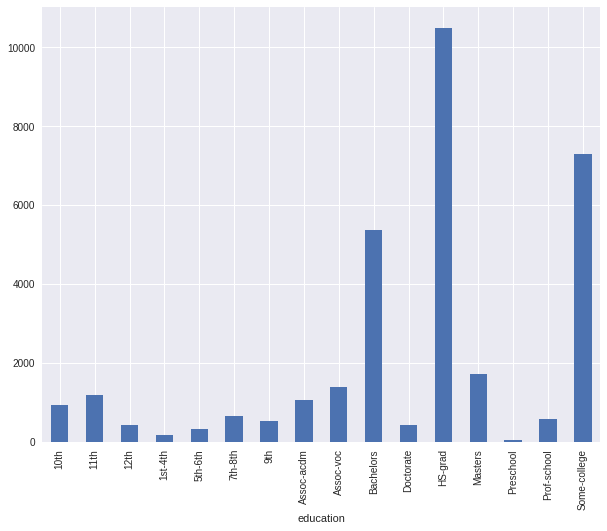

In [153]:
data.groupby(['education'])['education'].count().plot(kind='bar')

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [154]:
import numpy as np
data.groupby(['salary']).count()

data.groupby(['salary'])['age'].agg([np.mean, np.std])


,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [155]:
data[data['salary'] == '>50K'].groupby(['education'])['education'].count()

education
10th              62
11th              60
12th              33
1st-4th            6
5th-6th           16
7th-8th           40
9th               27
Assoc-acdm       265
Assoc-voc        361
Bachelors       2221
Doctorate        306
HS-grad         1675
Masters          959
Prof-school      423
Some-college    1387
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [156]:
data.groupby(['race'])[['age', 'sex']].max()

,age,sex
race,,
Amer-Indian-Eskimo,82,Male
Asian-Pac-Islander,90,Male
Black,90,Male
Other,77,Male
White,90,Male


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [157]:
married = data['marital-status'].map(lambda s: True if s.startswith("Married") else False)
data.insert(loc=len(data.columns), column='married', value=married)


In [158]:
data[data['salary'] == '>50K' ].groupby(['married'])['married'].count()

married
False    1105
True     6736
Name: married, dtype: int64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [159]:
max_work = data['hours-per-week'].max()
print(max_work)
print(data[data['hours-per-week'] == max_work].info())
data[data['hours-per-week'] == max_work]['salary'].value_counts(normalize=True)



99
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 935 to 32531
Data columns (total 16 columns):
age               85 non-null int64
workclass         85 non-null object
fnlwgt            85 non-null int64
education         85 non-null object
education-num     85 non-null int64
marital-status    85 non-null object
occupation        85 non-null object
relationship      85 non-null object
race              85 non-null object
sex               85 non-null object
capital-gain      85 non-null int64
capital-loss      85 non-null int64
hours-per-week    85 non-null int64
native-country    85 non-null object
salary            85 non-null object
married           85 non-null bool
dtypes: bool(1), int64(6), object(9)
memory usage: 10.7+ KB
None


<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [160]:
data.groupby(['salary', 'native-country'])['hours-per-week'].mean()
data.pivot_table(['hours-per-week'], ['native-country', 'salary'], aggfunc='mean').loc['Japan']


,hours-per-week
salary,
<=50K,41.000000
>50K,47.958333
